#  หุ้นใน SET50 ที่เพิ่มขึ้นสูงสุดในรอบ 1 สัปดาห์

![title](datasource/lab30.jpg)

เอกสารจาก
https://www.facebook.com/ThaiQuest/photos/a.134918503245795/8300230453381185

In [ ]:
sx.indexMarket.SET50.value

In [100]:
#!pip install starfishX --upgrade
%config InlineBackend.figure_format='retina'

import starfishX as sx
from starfishX.utilHelpers import HistStockPrice

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print(sx.__version__)

0.15554


In [101]:
basket = sx.getMemberOfIndex(sx.indexMarket.SET50)
basket

array(['ADVANC', 'AOT', 'AWC', 'BANPU', 'BBL', 'BDMS', 'BEM', 'BGRIM',
       'BH', 'BLA', 'BTS', 'CBG', 'CPALL', 'CPF', 'CPN', 'CRC', 'DTAC',
       'EA', 'EGCO', 'GLOBAL', 'GPSC', 'GULF', 'HMPRO', 'INTUCH', 'IRPC',
       'IVL', 'JMART', 'JMT', 'KBANK', 'KCE', 'KTB', 'KTC', 'LH', 'MINT',
       'MTC', 'OR', 'OSP', 'PTT', 'PTTEP', 'PTTGC', 'SAWAD', 'SCB', 'SCC',
       'SCGP', 'TIDLOR', 'TISCO', 'TOP', 'TRUE', 'TTB', 'TU'],
      dtype=object)

In [102]:
obj = HistStockPrice() 

In [103]:
#df = obj.getPrice('EA',start='2022-10-12')
#k = (df.tail(1)['EA'].values[0]/df.head(1)['EA'].values[0])-1
#k

In [48]:
pct_change = []
close_price = []
for i in basket:
  df = obj.getPrice(i,start='2022-10-12')
  k = (df.tail(1)[i].values[0]/df.head(1)[i].values[0])-1
  pct_change.append(round(k*100,2))
  close_price.append(df.tail(1)[i].values[0])

In [104]:
df = pd.DataFrame({'symbol':basket,'chg':pct_change,
                   'close':close_price})
df.sort_values('chg',ascending=False).head(10)

symbol   chg  close
17     EA  7.30  95.50
33   MINT  7.00  26.75
11    CBG  6.67  88.00
7   BGRIM  6.61  32.25
48    TTB  6.61   1.29
12  CPALL  6.36  58.50
14    CPN  5.14  66.50
25    IVL  4.52  40.50
34    MTC  4.38  35.75
29    KCE  4.35  42.00

(3.0, 8.0)

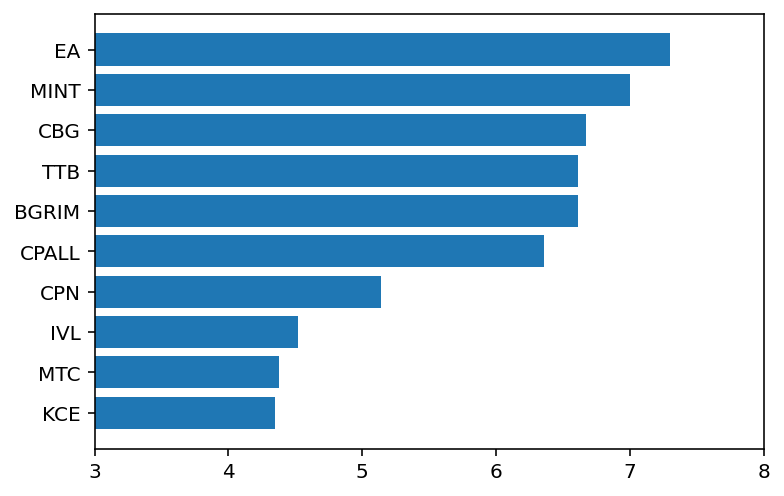

In [117]:
k = df.sort_values('chg',ascending=False).head(10)
k = k.sort_values('chg',ascending=True)
plt.barh(y=k['symbol'].values,width=k['chg'].values)

plt.xlim([3, 8])